In [29]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 11.0 MB/s eta 0:00:00


##Import Libraries

In [30]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import zipfile
import os

#Read the data

In [60]:
# Download the "YearData-NoNull" zip file for a particular year to run your model on
os.chdir('/content')

!gdown  'https://drive.google.com/uc?id=1Rn4CzoiKDqy5wXxFX-EEr-57qCwKNHIp'  #YearData_NoNull 2018.zip

Downloading...
From (original): https://drive.google.com/uc?id=1Rn4CzoiKDqy5wXxFX-EEr-57qCwKNHIp
From (redirected): https://drive.google.com/uc?id=1Rn4CzoiKDqy5wXxFX-EEr-57qCwKNHIp&confirm=t&uuid=3631d444-7c18-4aa6-921c-2b0e8590eef2
To: /content/YearData_NoNull 2018.zip
100% 28.9M/28.9M [00:00<00:00, 171MB/s]


In [61]:
import zipfile
year=   str(2018)

File_name_YearData_zip = 'YearData_NoNull '  + year  +'.zip'
File_name_YearData_csv = 'YearData_NoNull '  + year  +'.csv'

with zipfile.ZipFile(File_name_YearData_zip, 'r') as zip_ref:
 zip_ref.extractall()
data= pd.read_csv(File_name_YearData_csv)


data = data.drop('Unnamed: 0',axis=1)
data.shape

(1090754, 27)

In [62]:

data['fico_correlation_1'] = 0.5*data['fico'] + pd.DataFrame(np.random.normal(0, 10,len(data)),columns=['a'])['a']
data['fico_correlation_2'] = 0.7*data['fico'] + pd.DataFrame(np.random.normal(0, 10,len(data)),columns=['a'])['a']
data['fico_100_Perc_corre'] = 0.7*data['fico']
data['dti_correlations_1'] = data['dti'] + pd.DataFrame(np.random.normal(0, 5,len(data)),columns=['a'])['a']
data['cltv_correlation_1'] = data['cltv'] + pd.DataFrame(np.random.normal(0, 5,len(data)),columns=['a'])['a']
data['cltv_correlation_2'] = data['cltv'] + pd.DataFrame(np.random.normal(0, 7,len(data)),columns=['a'])['a']
data['cltv_correlation_3'] = data['cltv'] + pd.DataFrame(np.random.normal(0, 2,len(data)),columns=['a'])['a']
data['orig_loan_term_correlation_1'] = data['orig_loan_term'] + pd.DataFrame(np.random.normal(0, 23,len(data)),columns=['a'])['a']
data['orig_loan_term_correlation_2'] = data['orig_loan_term'] + pd.DataFrame(np.random.normal(0, 23,len(data)),columns=['a'])['a']
data['int_rt_correlation_1'] = 2*data['int_rt'] + pd.DataFrame(np.random.normal(0, 0.5,len(data)),columns=['a'])['a']
data['int_rt_correlation_2'] = 3*data['int_rt'] + pd.DataFrame(np.random.normal(0, 0.8,len(data)),columns=['a'])['a']


data.loc[data['Default']=='NO' , 'New_Column'] = 1
n = len(data.loc[data['New_Column']==1])
data = data.sort_values(by='New_Column', ascending=False).reset_index(drop=True)
data = data.iloc[int(np.round(0.95*n,0)):, :]
data = data.drop(columns='New_Column')
data = data.drop(columns='ppmt_pnlty')
data = data.drop(columns='id_loan')
data = data.drop(columns='st')
data = data.drop(columns='seller_name')



data = data.sample(frac=1, random_state=123)
data = data.reset_index(drop=True)


data = data.sample(frac=1, random_state=123)
data = data.reset_index(drop=True)


data = data.drop(columns=['flag_fthb', 'occpy_sts' , 'channel'  ,'prod_type' , 'prop_type',  'loan_purpose' ,  'servicer_name' , 'flag_sc', 'zipcode'])
data.loc[data['Default']=='NO' , 'Default'] = 0
data.loc[data['Default']=='YES' , 'Default'] = 1
data['Default'] = data['Default'].astype('int')

display(data.head(1))
print(data.shape)



,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,orig_loan_term,cnt_borr,Default,fico_correlation_1,fico_correlation_2,fico_100_Perc_corre,dti_correlations_1,cltv_correlation_1,cltv_correlation_2,cltv_correlation_3,orig_loan_term_correlation_1,orig_loan_term_correlation_2,int_rt_correlation_1,int_rt_correlation_2
0,786.0,201807,203806,35004.0,0.0,1.0,38.0,29.0,206000,38.0,4.5,240,2.0,0,381.169637,564.006578,550.2,38.72446,42.84392,28.685693,35.656226,213.268851,265.086165,9.078286,13.23852


(57210, 25)


In [63]:
X = data.drop(columns='Default')
Y = data['Default']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=1234)
LR.fit(X_train, Y_train )

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=1234)
RF.fit(X_train, Y_train )

from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, Y_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#Shap

**Linear Model Explainer**

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

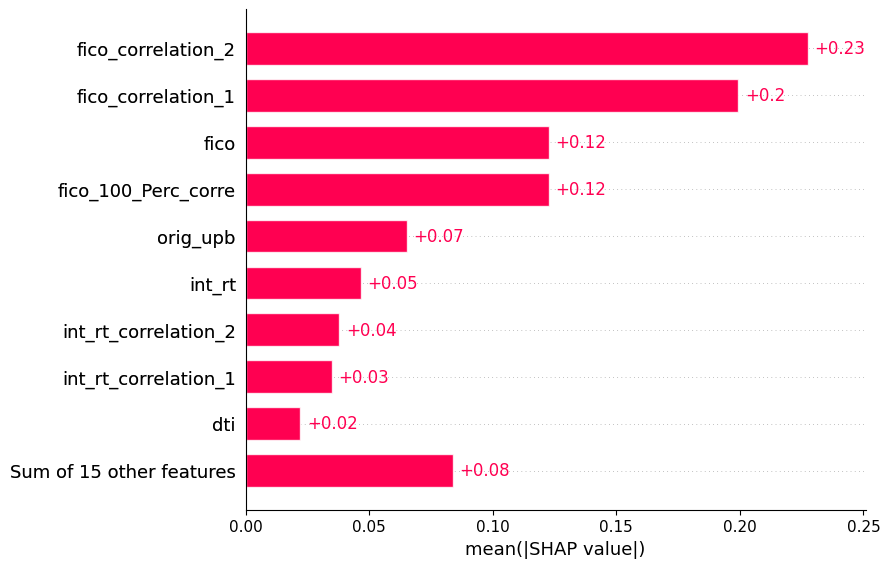

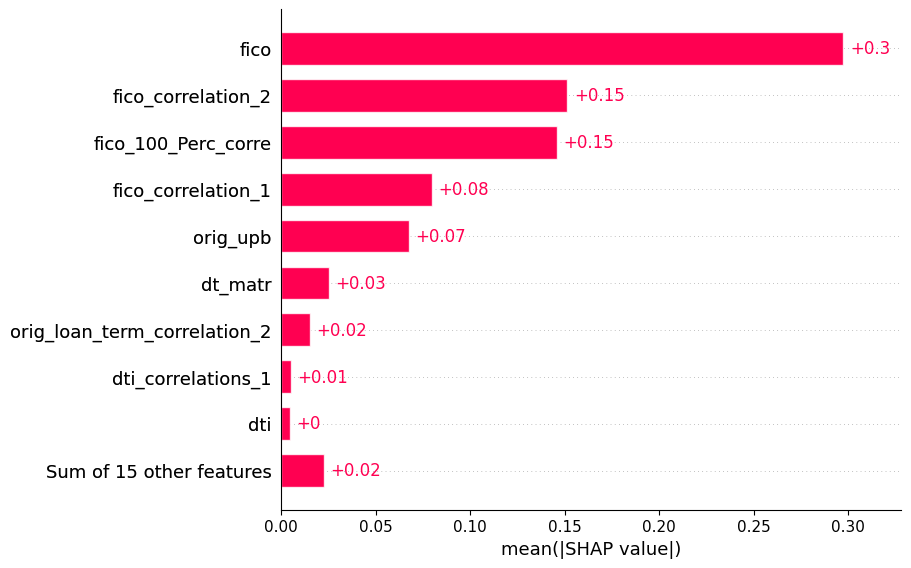

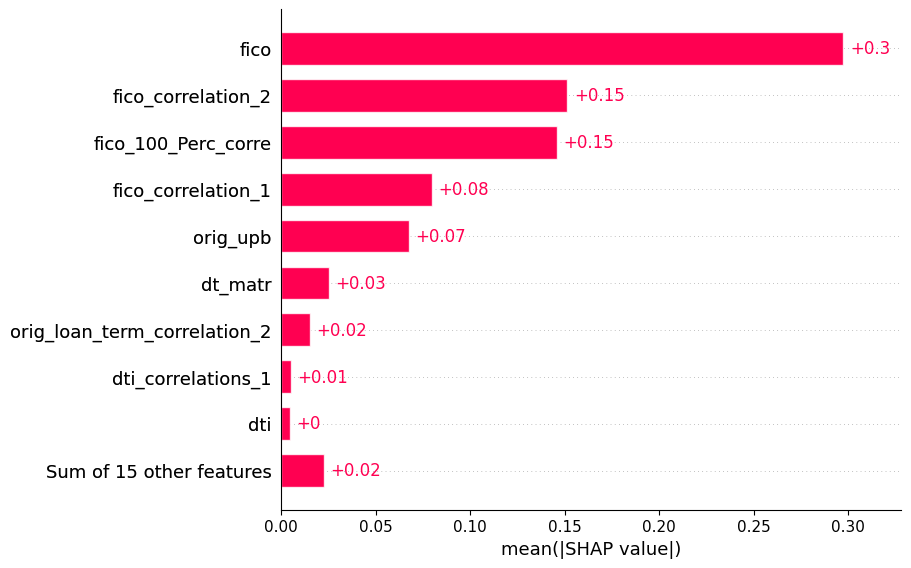

[[-0.007645185093332381, -4.21533914561334e-05, 8.718262668949874e-05, 2.071067861559207e-07, 0.0002119684238745279, 7.432141669158656e-06, 0.00021548335216696864, 0.0005841482904206019, -6.511262719765158e-07, 0.0002115917874530326, 4.25252214250556e-05, 0.00011757136091803915, -3.577357397583761e-05, -0.0038196059988037773, -0.005378169269741695, -0.005351629565228116, 0.0005911206387629184, 0.00018552751330454983, 0.00019127733001098957, 0.00021766952118332713, -1.9614749794034988e-05, 0.00039887154491583427, 8.38754218965924e-05, 0.0001278340773684246]]
['fico', 'dt_first_pi', 'dt_matr', 'cd_msa', 'mi_pct', 'cnt_units', 'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'orig_loan_term', 'cnt_borr', 'fico_correlation_1', 'fico_correlation_2', 'fico_100_Perc_corre', 'dti_correlations_1', 'cltv_correlation_1', 'cltv_correlation_2', 'cltv_correlation_3', 'orig_loan_term_correlation_1', 'orig_loan_term_correlation_2', 'int_rt_correlation_1', 'int_rt_correlation_2']


In [64]:
shap_values_w_data_corredep = shap.LinearExplainer(LR, X_train, feature_perturbation='correlation_dependent')(X_train)   #True to the Data
shap_values_w_interv = shap.LinearExplainer(LR, X_train, feature_perturbation='interventional')(X_train)                 #True to the Model
shap_values_w_data = shap.LinearExplainer(LR, X_train)(X_train)   #True to the Model (because default is  feature_perturbation='interventional' )

#######################################################################################################################################################
shap.plots.bar(shap_values_w_data_corredep)
shap.plots.bar(shap_values_w_interv)
shap.plots.bar(shap_values_w_data)
#######################################################################################################################################################
print(LR.coef_.tolist())
print(X_train.columns.tolist())



**XG-Boost Model Explainer**

100%|===================| 45675/45768 [03:14<00:00]       

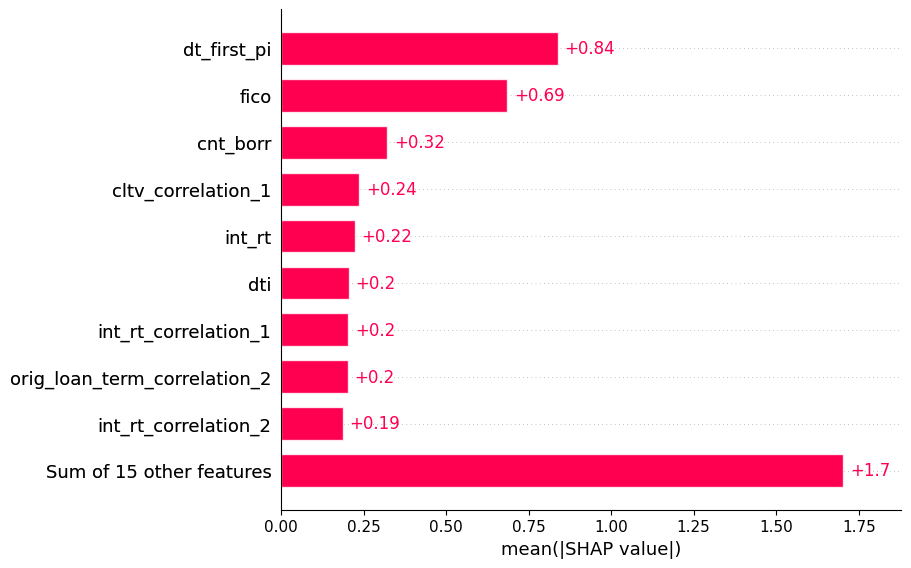

,feature,value
1,dt_first_pi,0.838331
0,fico,0.685436
12,cnt_borr,0.321292
17,cltv_correlation_1,0.236499
10,int_rt,0.222600
7,dti,0.204257
22,int_rt_correlation_1,0.203951
21,orig_loan_term_correlation_2,0.202169
23,int_rt_correlation_2,0.186417
3,cd_msa,0.182418


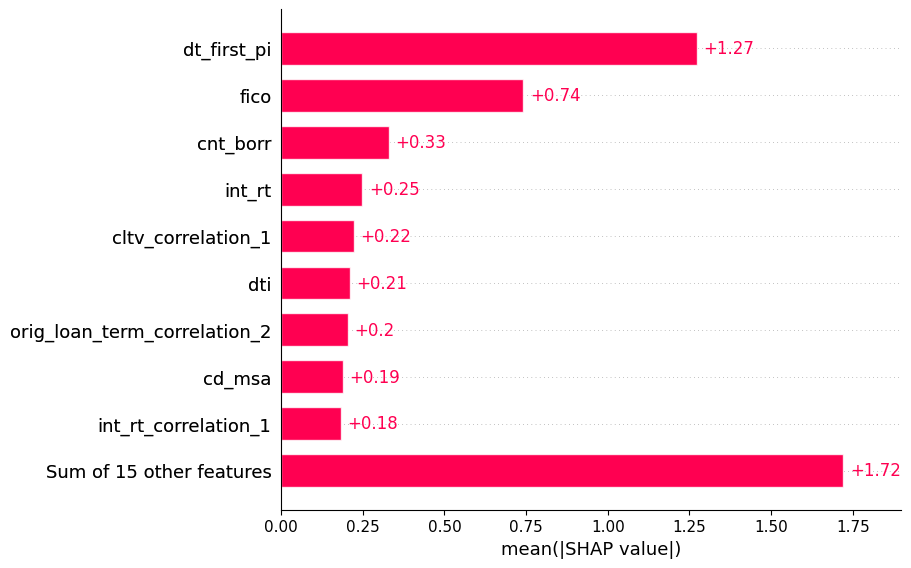

,feature,value
1,dt_first_pi,1.272558
0,fico,0.741456
12,cnt_borr,0.330584
10,int_rt,0.248072
17,cltv_correlation_1,0.222789
7,dti,0.210797
21,orig_loan_term_correlation_2,0.203357
3,cd_msa,0.189517
22,int_rt_correlation_1,0.183561
23,int_rt_correlation_2,0.181772


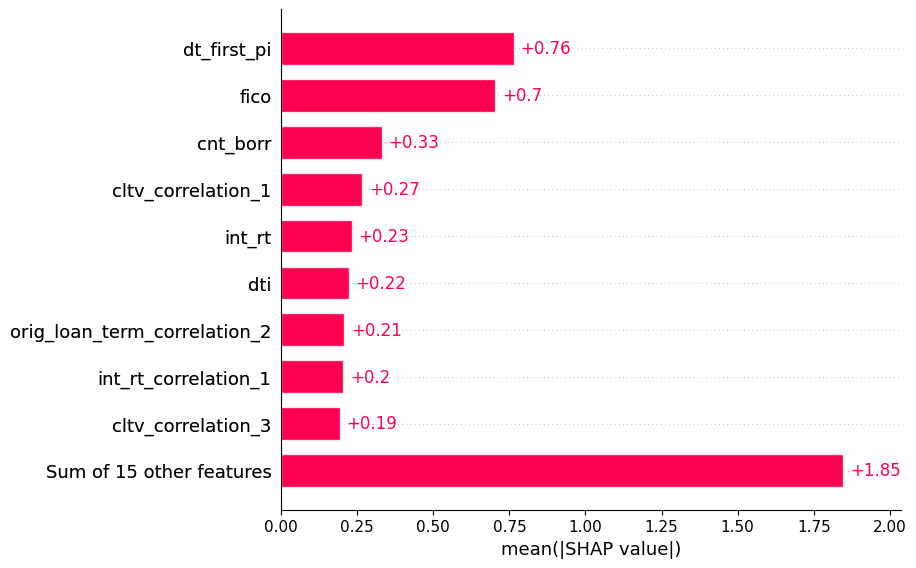

,feature,value
1,dt_first_pi,0.764399
0,fico,0.703346
12,cnt_borr,0.329901
17,cltv_correlation_1,0.266266
10,int_rt,0.232846
7,dti,0.222636
21,orig_loan_term_correlation_2,0.207742
22,int_rt_correlation_1,0.204098
19,cltv_correlation_3,0.192157
18,cltv_correlation_2,0.190524


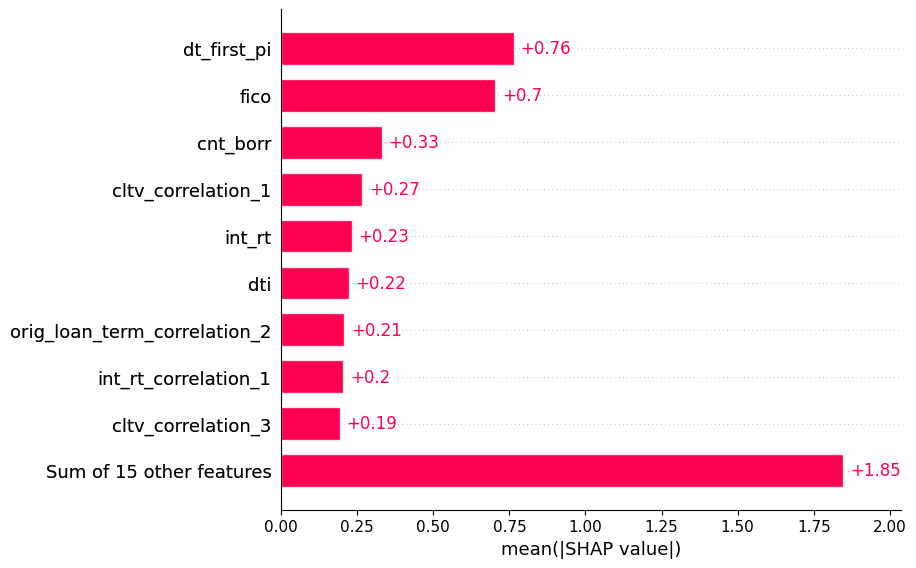

,feature,value
1,dt_first_pi,0.764399
0,fico,0.703346
12,cnt_borr,0.329901
17,cltv_correlation_1,0.266266
10,int_rt,0.232846
7,dti,0.222636
21,orig_loan_term_correlation_2,0.207742
22,int_rt_correlation_1,0.204098
19,cltv_correlation_3,0.192157
18,cltv_correlation_2,0.190524




XG-Boost feature importance function:


,feature,value
1,dt_first_pi,0.629408
2,dt_matr,0.055433
0,fico,0.025454
12,cnt_borr,0.024533
10,int_rt,0.018895
13,fico_correlation_1,0.016898
14,fico_correlation_2,0.016796
4,mi_pct,0.016431
16,dti_correlations_1,0.015687
22,int_rt_correlation_1,0.015684


In [92]:
'''
Create an explainer object by calling the Exlplainer function from the SHAP library, passing the LR model as a parameter.
The SHAP values represent the contribution of each feature to the prediction made by the model for each instance in X_test
'''

shap_values_w_data_pathdep = shap.TreeExplainer(XGB, shap.maskers.Independent(X_train, max_samples= X_train.shape[0]), feature_perturbation="tree_path_dependent")(X_train)  #True to the Data
#shap_values_w_data_pathdep = shap.TreeExplainer(XGB, X_train, feature_perturbation="tree_path_dependent")(X_train)                                                           #This will not work
shap_values_wo_data_pathdep = shap.TreeExplainer(XGB, feature_perturbation="tree_path_dependent")(X_train)                        #True to the Data (works ONLY for the XG-Boost. We MUST provide data for other models)

shap_values_w_data_interv = shap.TreeExplainer(XGB, X_train, feature_perturbation="interventional")(X_train)      #True to the model
shap_values_w_data = shap.TreeExplainer(XGB, X_train)(X_train)      #True to the model (because default is  feature_perturbation='interventional' )
#############################################################################################################################################################################
shap.plots.bar(shap_values_w_data_pathdep)
df = pd.DataFrame({'feature': shap_values_w_data_pathdep.feature_names, 'value':shap_values_w_data_pathdep.abs.mean(0).values})
display(df.sort_values(by='value', ascending=False))
print('\n')


shap.plots.bar(shap_values_wo_data_pathdep)  #works ONLY for the XG-Boost. We MUST provide data for other models)
df = pd.DataFrame({'feature': shap_values_wo_data_pathdep.feature_names, 'value':shap_values_wo_data_pathdep.abs.mean(0).values})
display(df.sort_values(by='value', ascending=False))
print('\n')


shap.plots.bar(shap_values_w_data_interv)
df = pd.DataFrame({'feature': shap_values_w_data_interv.feature_names, 'value':shap_values_w_data_interv.abs.mean(0).values})
display(df.sort_values(by='value', ascending=False))
print('\n')

shap.plots.bar(shap_values_w_data)
df = pd.DataFrame({'feature': shap_values_w_data.feature_names, 'value':shap_values_w_data.abs.mean(0).values})
display(df.sort_values(by='value', ascending=False))
print('\n')

print('XG-Boost feature importance function:')
df = pd.DataFrame({'feature': XGB.get_booster().feature_names, 'value':XGB.feature_importances_})
display(df.sort_values(by='value', ascending=False))
print('\n')



In [66]:
shap_values_w_data

.values =
array([[ 1.07299013, -0.38961034, -0.08256133, ...,  0.0771911 ,
        -0.14786061,  0.04549368],
       [-0.38766596, -0.52535062, -0.09304897, ...,  0.56581565,
        -0.05236684, -0.02335475],
       [ 0.74771047, -0.59317682, -0.0738744 , ..., -0.38044992,
        -0.18518025,  0.04286819],
       ...,
       [ 0.68912281, -0.51254416, -0.06550888, ...,  0.11331853,
        -0.30449788,  0.03207227],
       [ 0.64931796, -0.50307372,  0.1276785 , ..., -0.42919053,
         0.32012806, -0.44618188],
       [ 1.17753459, -0.49336837, -0.07005729, ...,  0.19599236,
         0.05237943,  0.07122027]])

.base_values =
array([-5.55219548, -5.55219548, -5.55219548, ..., -5.55219548,
       -5.55219548, -5.55219548])

.data =
array([[6.81000000e+02, 2.01807000e+05, 2.04806000e+05, ...,
        3.80942252e+02, 9.98988659e+00, 1.48885552e+01],
       [7.68000000e+02, 2.01807000e+05, 2.04806000e+05, ...,
        3.23397666e+02, 1.05306260e+01, 1.44630462e+01],
       [7.01000000

In [67]:
shap_values_w_data.values

array([[ 1.07299013, -0.38961034, -0.08256133, ...,  0.0771911 ,
        -0.14786061,  0.04549368],
       [-0.38766596, -0.52535062, -0.09304897, ...,  0.56581565,
        -0.05236684, -0.02335475],
       [ 0.74771047, -0.59317682, -0.0738744 , ..., -0.38044992,
        -0.18518025,  0.04286819],
       ...,
       [ 0.68912281, -0.51254416, -0.06550888, ...,  0.11331853,
        -0.30449788,  0.03207227],
       [ 0.64931796, -0.50307372,  0.1276785 , ..., -0.42919053,
         0.32012806, -0.44618188],
       [ 1.17753459, -0.49336837, -0.07005729, ...,  0.19599236,
         0.05237943,  0.07122027]])

In [94]:
shap_values_w_data.feature_names

['fico',
 'dt_first_pi',
 'dt_matr',
 'cd_msa',
 'mi_pct',
 'cnt_units',
 'cltv',
 'dti',
 'orig_upb',
 'ltv',
 'int_rt',
 'orig_loan_term',
 'cnt_borr',
 'fico_correlation_1',
 'fico_correlation_2',
 'fico_100_Perc_corre',
 'dti_correlations_1',
 'cltv_correlation_1',
 'cltv_correlation_2',
 'cltv_correlation_3',
 'orig_loan_term_correlation_1',
 'orig_loan_term_correlation_2',
 'int_rt_correlation_1',
 'int_rt_correlation_2']

#Plots

Bar Plot:
Here, the features are ranked from the highest to the lowest effect on the prediction.
 It takes into account the absolute SHAP valu, so it does not matter if the feature affects the prediction in a positive or negative way.


Mean of absolute shap values:
[0.7643985740119325, 0.703346336270138, 0.32990080821494555, 0.2662656873253536, 0.23284632943850284, 0.22263592216324496, 0.20774211611816748, 0.2040979132634027, 0.19215652477904066, 0.19052431252310778, 0.18510883431492495, 0.1823633156106863, 0.16961242743306365, 0.1674006376509904, 0.16112868080081738, 0.15413645563141073, 0.15353566067809096, 0.15326952404549982, 0.14663207853671376, 0.13487631997362745, 0.046999142484399646, 0.0019328230839636678, 0.0, 0.0]


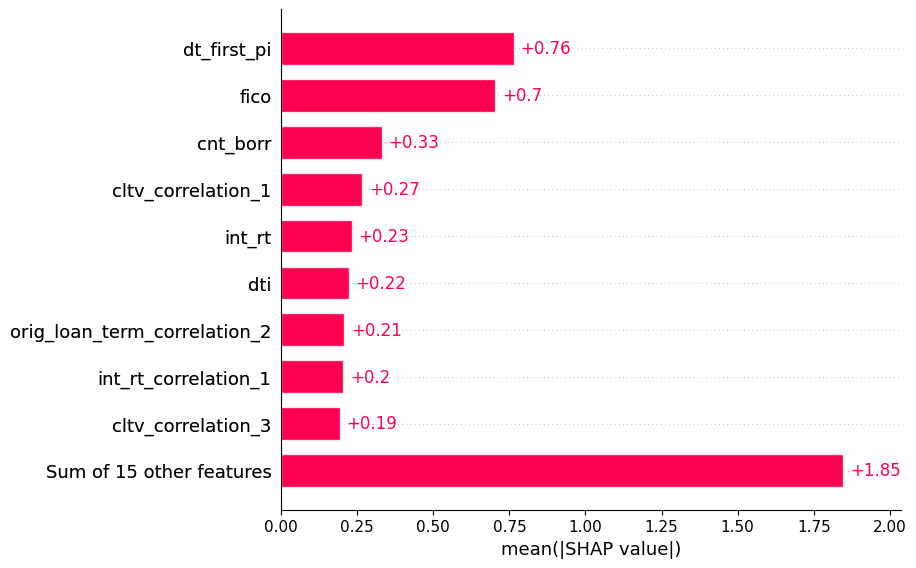

one single observation (1-st obs)


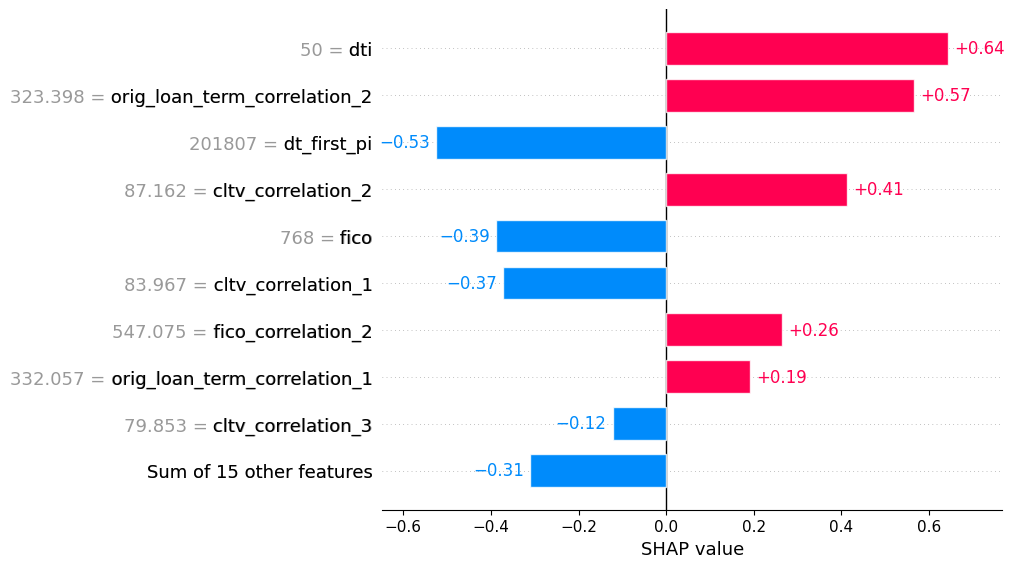

one other single observation (5-th obs)


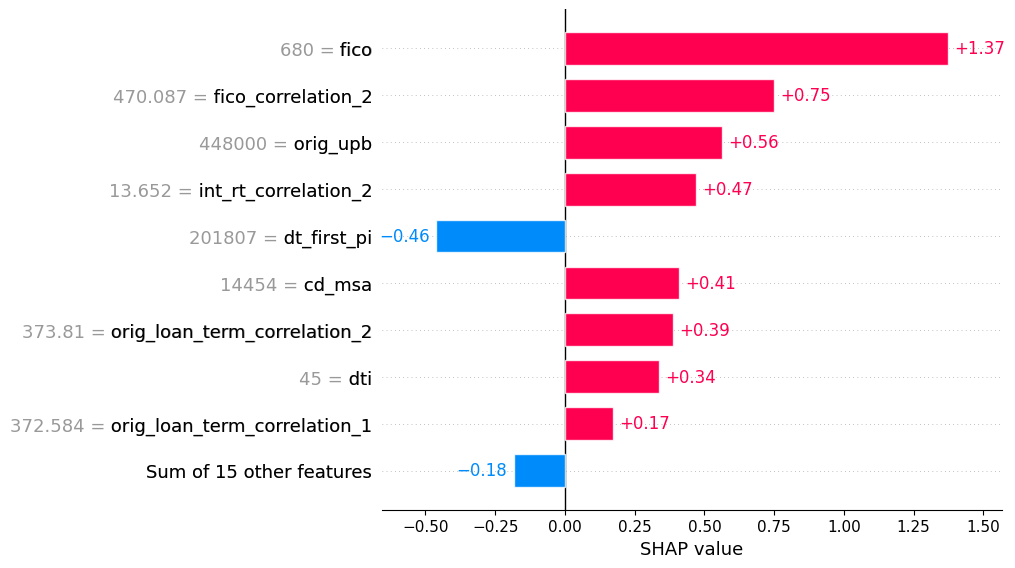



Waterfall Plot
For analysis of local, instance-wise effects, we can use the following plot on single observations
We can see how the sum of all the SHAP values equals the difference between the prediction f(x) and the expected value E[f(x)] 
In the waterfall plot, the x-axis has the values of the target (dependent) variable. x is the chosen observation, f(x) is the predicted value of the model, given input x,
 and E[f(x)] is the expected value of the target variable, or in other words, the mean of all predictions (mean(model.predict(X))) 


one single observation (1-st obs)


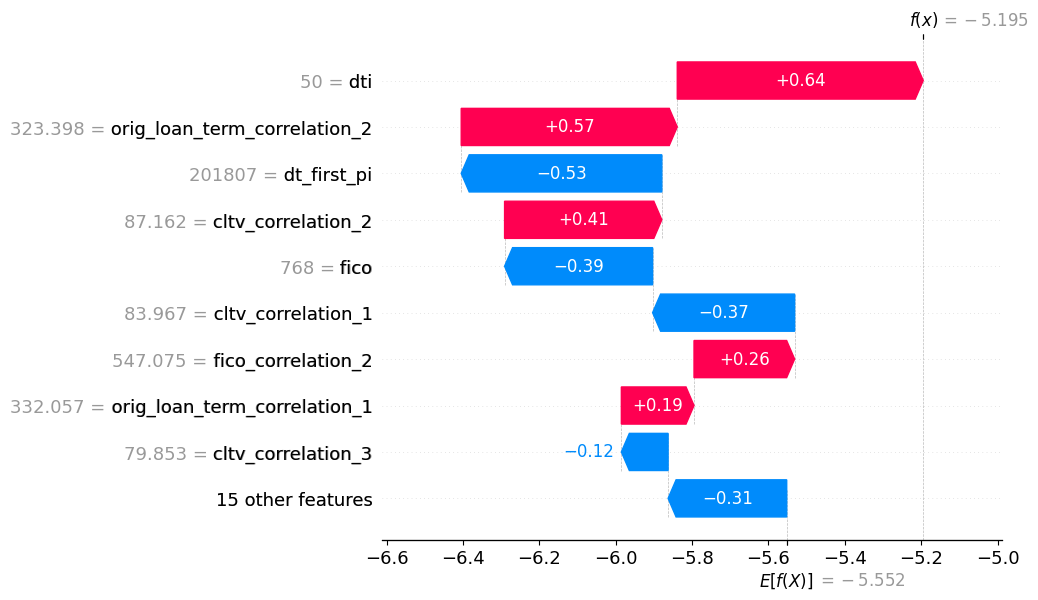

one other single observation (5-th obs)


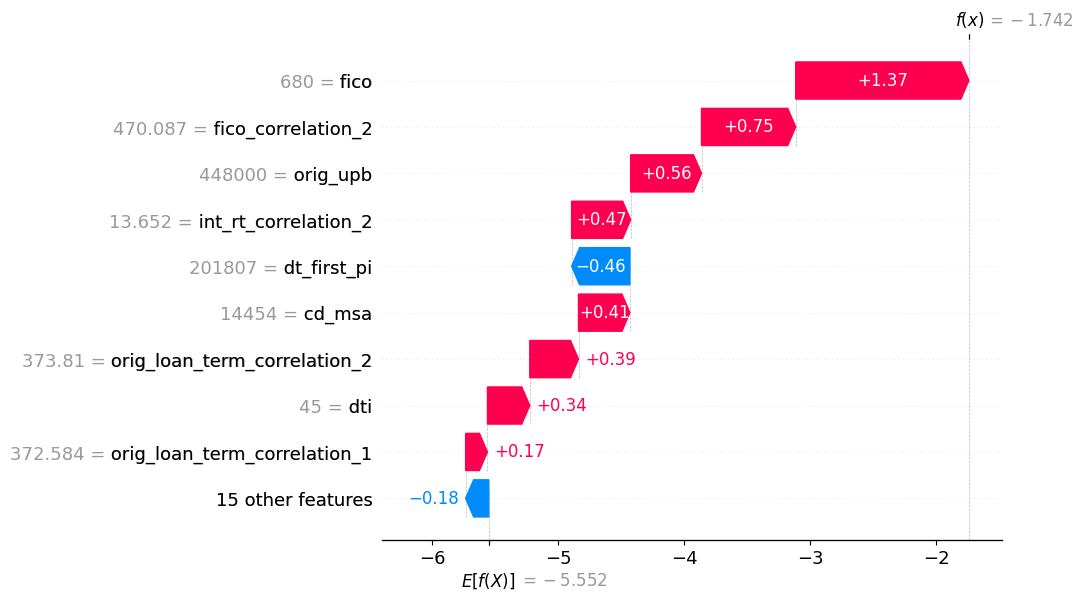

Beeswarm Plot:
All the little dots on the plot represent a single observation.
 The horizontal axis represents the shap value, while the color of the point shows us if that observation has a higher or a lower value, when compared to other observations. 


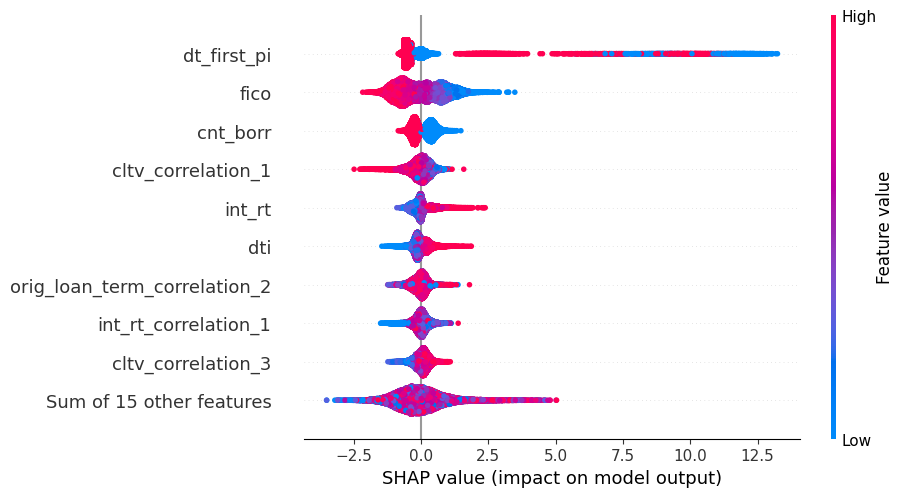

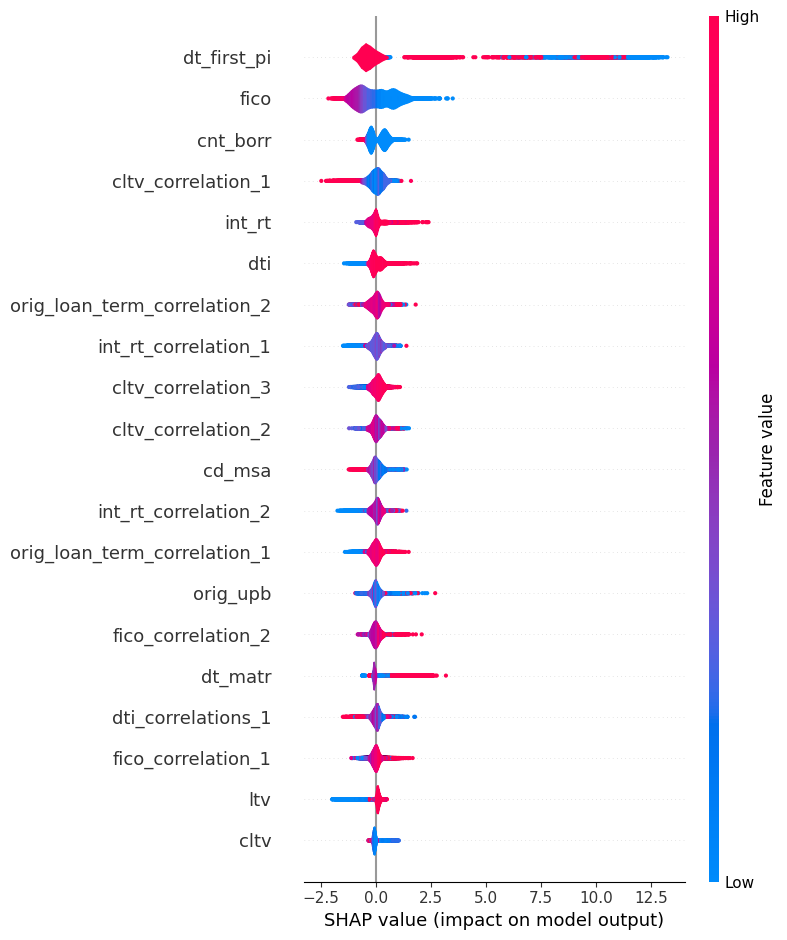

In [86]:
print('Bar Plot:')
print('''Here, the features are ranked from the highest to the lowest effect on the prediction.\n It takes into account the absolute SHAP valu, so it does not matter if the feature affects the prediction in a positive or negative way.''')
print('\n')

print('Mean of absolute shap values:')
print(pd.DataFrame(shap_values_w_data.values).abs().mean().sort_values(ascending=False).tolist())
shap.plots.bar(shap_values_w_data)
print('one single observation (1-st obs)')
shap.plots.bar(shap_values_w_data[1])
print('one other single observation (5-th obs)')
shap.plots.bar(shap_values_w_data[5])
print('\n')



print('Waterfall Plot')
print('''For analysis of local, instance-wise effects, we can use the following plot on single observations''')
print('''We can see how the sum of all the SHAP values equals the difference between the prediction f(x) and the expected value E[f(x)] ''')
print('''In the waterfall plot, the x-axis has the values of the target (dependent) variable. x is the chosen observation, f(x) is the predicted value of the model, given input x,\n and E[f(x)] is the expected value of the target variable, or in other words, the mean of all predictions (mean(model.predict(X))) ''')
print('\n')

print('one single observation (1-st obs)')
shap.plots.waterfall(shap_values_w_data[1])
print('one other single observation (5-th obs)')
shap.plots.waterfall(shap_values_w_data[5])


print('Beeswarm Plot:')
print('''All the little dots on the plot represent a single observation.\n The horizontal axis represents the shap value, while the color of the point shows us if that observation has a higher or a lower value, when compared to other observations. ''')
shap.plots.beeswarm(shap_values_w_data)
shap.summary_plot(shap_values_w_data, plot_type='violin')
print('\n')




